# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [191]:
import pandas as pd
#df_beer = pd.read_csv("craftcans.csv").fillna(0)
df_beer = pd.read_csv("craftcans.csv")

## Read in the file `craftcans.csv`, and look at the first first rows

In [11]:
df_beer.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [12]:
df_beer.shape

(2416, 7)

In [13]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [26]:
df_beer.groupby("Brewery")["Beer"].nunique().sort_values(ascending=False).to_frame("Beers")

,Beers
Brewery,
Brewery Vivant,62
Oskar Blues Brewery,41
Sun King Brewing Company,38
Sixpoint Craft Ales,24
Cigar City Brewing Company,24
...,...
Terrapin Brewing Company,1
Bare Hands Brewery,1
Beach Brewing Company,1


## What is the most common ABV? (alcohol by volume)

In [39]:
abv= df_beer["ABV"].value_counts()
abv.head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [47]:
df_beer["ABV"].describe()

count      2348
unique       74
top       5.00%
freq        215
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [61]:
#df_beer["ABV"].str.extract(r"(\d+\.\d+)").astype(float)
#I learned this from Sandhya today, wanted to try it out. :D But here's what you probably wanted us to do:
df_beer["ABV"].str.replace("%", "")
df_beer["ABV"]=df_beer["ABV"].str.replace("%", "").astype(float)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [63]:
df_beer.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [73]:
df_beer["ABV"].mean()

np.float64(5.977342419080068)

In [74]:
df_beer["ABV"].median()

np.float64(5.6)

<Axes: >

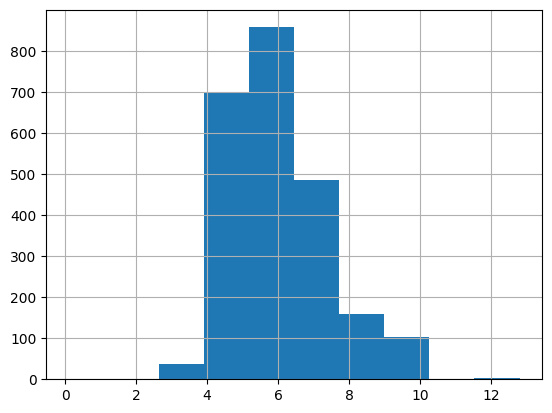

In [80]:
df_beer["ABV"].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [82]:
df_beer["ABV"].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [93]:
df_beer["Location"].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [243]:
df_beer[df_beer["Location"]=="Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50%,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70%,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90%,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.70%,19
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.00%,70
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.70%,74
1093,KelSo India Pale Ale,KelSo Beer Company,"Brooklyn, NY",American IPA,12 oz.,6.00%,64


## What brewery in Brooklyn puts out the most different cans of beer?

In [118]:
brooklyn.groupby("Brewery")["Beer"].nunique().sort_values(ascending=False).head(1)

Brewery
Sixpoint Craft Ales    24
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [142]:
df_beer[df_beer["Brewery"] == "Sixpoint Craft Ales"]["Style"].value_counts().head(6)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Rye Beer                          2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [172]:
ny_beer = df_beer[df_beer["Location"].str.contains("NY", na=False)]
ny_breweries = ny_beer["Brewery"].unique()
ny_breweries

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [170]:
len(ny_breweries) #OR
ny_beer["Brewery"].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [179]:
df_beer[df_beer["Style"].str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [187]:
df_beer["IBUs"]=df_beer["IBUs"].astype(int)

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [196]:
df_beer["IBUs"].unique()

array(['50', '26', '19', '38', '25', '47', '68', '80', '42', '21', '13',
       '17', 'Does not apply', '65', '20', '18', '15', '45', '100', '85',
       '24', '30', '28', '16', '75', '35', '54', '12', '10', '40', '72',
       '90', '46', '64', '31', '37', '27', '58', '29', '23', '22', '11',
       '60', '8', '34', '52', '70', '51', '44', '33', '5', '82', '115',
       '69', '55', '63', '67', '93', '66', '126', '61', '36', '87', '88',
       '103', '6', '9', '14', '49', '32', '89', '43', '71', '7', '73',
       '41', '53', '62', '77', '86', '118', '81', '130', '99', '76', '48',
       '39', '83', '108', '74', '104', '110', '111', '135', '95', '92',
       '78', '101', '94', '98', '57', '4', '120', '138', '105', '91',
       '97', '113'], dtype=object)

In [204]:
#df_beer=df_beer.dropna(subset=["IBUs"]) if there were empty values
df_beer=df_beer[df_beer['IBUs'] != 'Does not apply']
df_beer["IBUs"]=df_beer["IBUs"].astype(int)
df_beer["IBUs"].mean()

np.float64(42.71316725978647)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

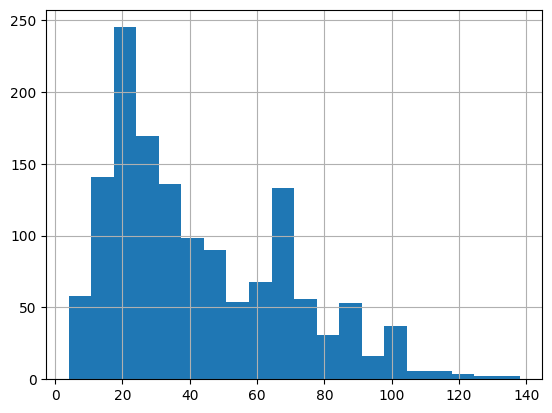

In [206]:
df_beer["IBUs"].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [223]:
high_ibu_beers = df_beer[df_beer["IBUs"] >= df_beer["IBUs"].quantile(0.75)]

high_ibu_beers["Beer"]

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 353, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [225]:
low_ibu_beers = df_beer[df_beer["IBUs"] <= df_beer["IBUs"].quantile(0.25)]

low_ibu_beers["Beer"]

2                          Wall's End
11                      Flesh Gourd'n
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
                    ...              
2385              Bikini Blonde Lager
2395                     Dunkel Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 360, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [271]:
df_beer["IBUs"].groupby(df_beer["Style"]).median().sort_values(ascending=False, na_position="last")
#I can't get the NaN at the bottom. na_position="last" works only for values, not for index in this example. 


Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Hefeweizen                            15.0
Light Lager                           12.0
Gose                                  10.0
American Adjunct Lager                 9.0
Berliner Weissbier                     8.0
Name: IBUs, Length: 90, dtype: float64

<Axes: ylabel='Style'>

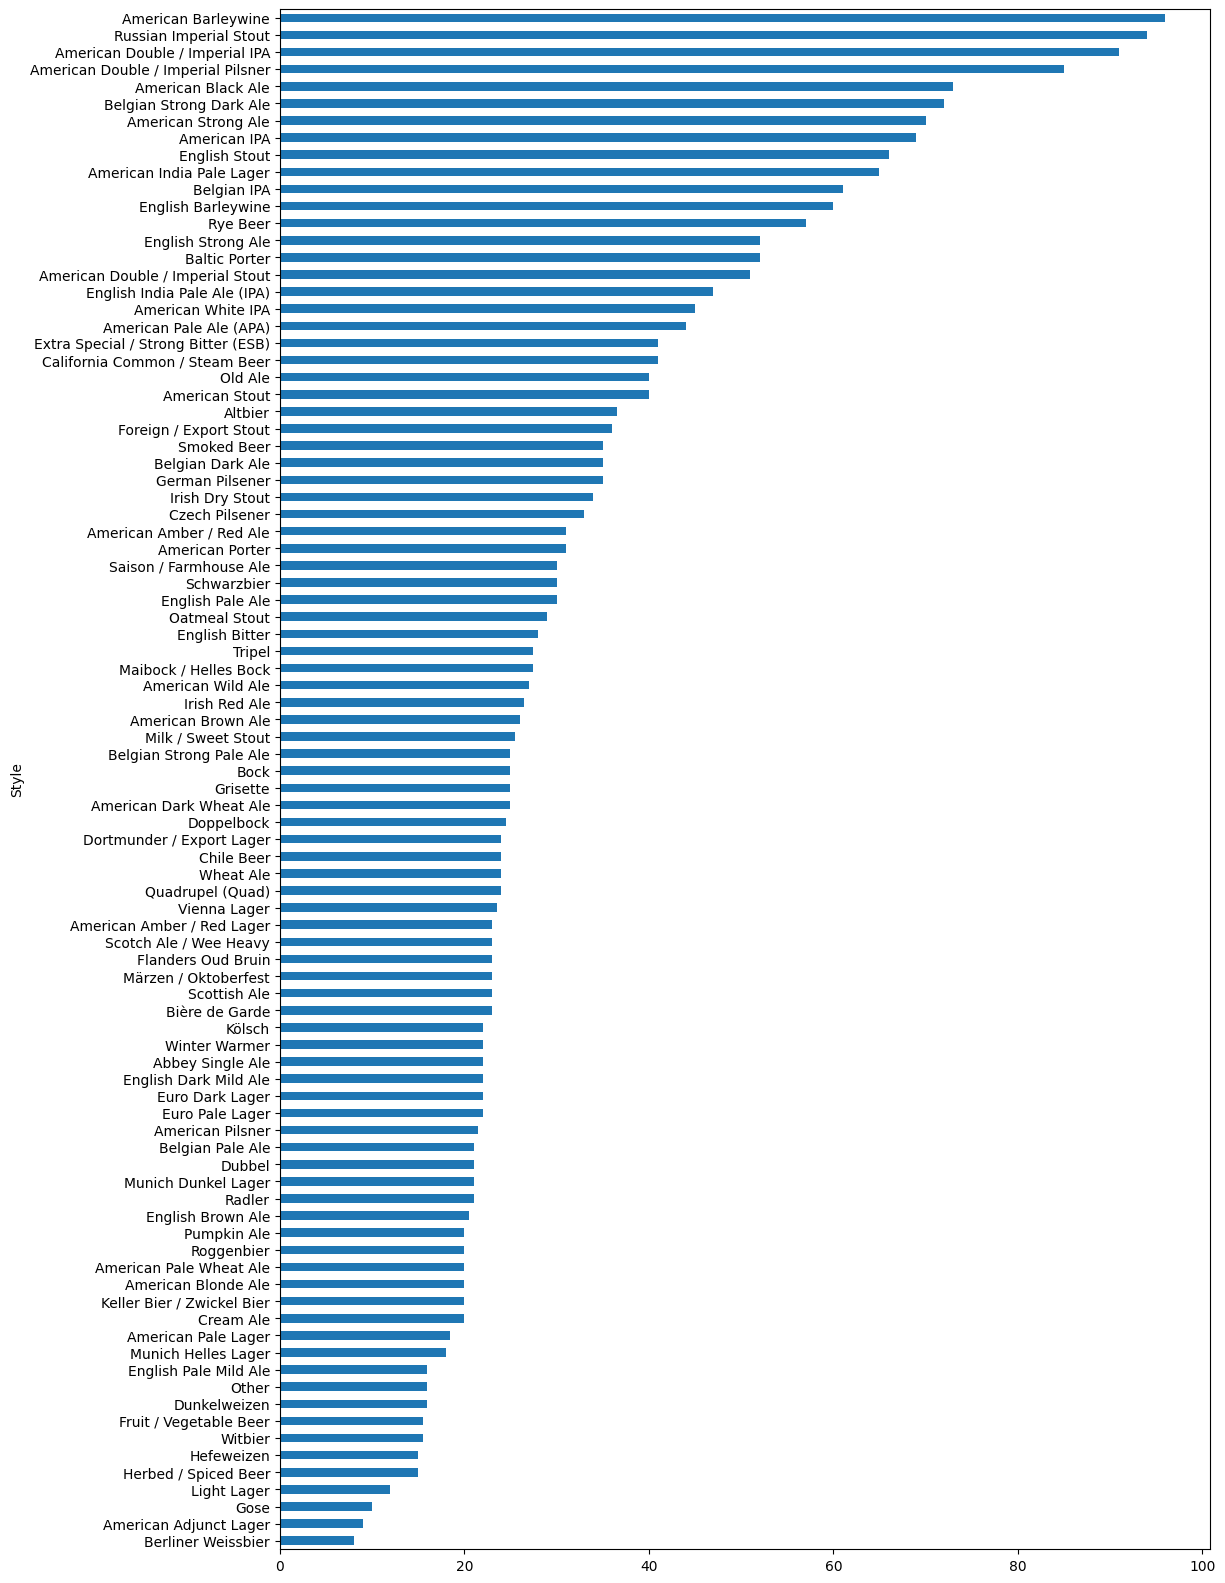

In [275]:
df_beer["IBUs"].groupby(df_beer["Style"]).median().sort_values(na_position="last").plot(kind="barh", figsize=(12, 20))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [267]:
high_ibu_beers["Style"].value_counts().head()

Style
American IPA                      201
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [268]:
low_ibu_beers["Style"].value_counts().head()

Style
American Pale Wheat Ale    44
American Blonde Ale        40
Fruit / Vegetable Beer     29
Witbier                    21
Hefeweizen                 21
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [285]:
df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBUs"].groupby(df_beer["Style"]).mean()

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

array([[<Axes: title={'center': 'IBUs'}>]], dtype=object)

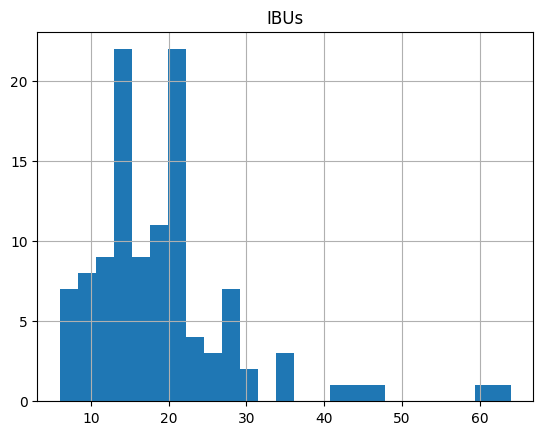

In [379]:
#df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBUs"].groupby(df_beer["Style"]).mean().sort_values(ascending=True).plot(kind="barh")

df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [329]:
df_beer[df_beer["Style"].str.contains("IPA", case=False, na=False)]["IBUs"].groupby(df_beer["Style"]).mean()


Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
American White IPA                48.833333
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
Name: IBUs, dtype: float64

<Axes: >

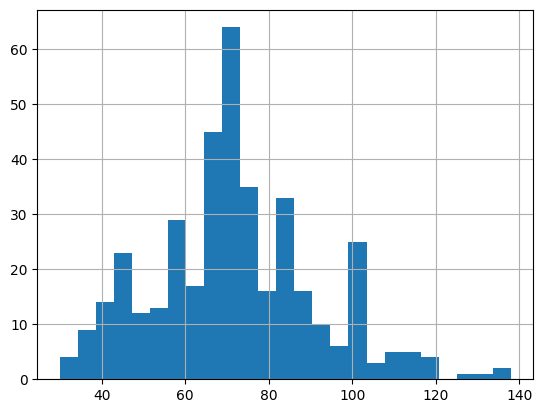

In [366]:
df_beer[df_beer["Style"].str.contains("IPA", case=False, na=False)]["IBUs"].hist(bins=25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

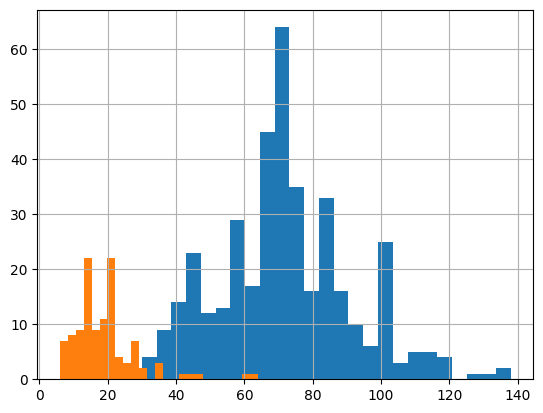

In [370]:
df_beer[df_beer["Style"].str.contains("IPA", case=False, na=False)]["IBUs"].hist(bins=25)
df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBUs"].hist(bins=25)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [375]:
df_beer[df_beer["Style"].str.contains("IPA", case=False, na=False)]["ABV"].str.replace("%", "").astype(float).mean()

np.float64(6.914285714285714)

In [377]:
df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["ABV"].str.replace("%", "").astype(float).mean()

np.float64(4.915178571428571)

<Axes: >

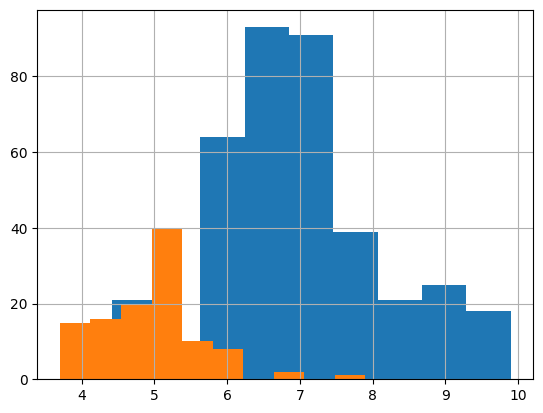

In [378]:
df_beer[df_beer["Style"].str.contains("IPA", case=False, na=False)]["ABV"].str.replace("%", "").astype(float).hist()
df_beer[df_beer["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["ABV"].str.replace("%", "").astype(float).hist()

## Good work!